In [ ]:
#Import pandas, import data using GitHub url, convert csv to df
import pandas as pd
url = 'https://raw.githubusercontent.com/mejdabour4/Chicago_Crime_Analysis/main/5%20Day%20Crimes.csv'
df1 = pd.read_csv(url)
#Examine dataset
df1.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD303473,7/20/2020 5:08,070XX S ASHLAND AVE,ROBBERY,GAS STATION,N,17.0,1166899.0,1857936.0,41.765736,-87.663819,"(41.76573639, -87.66381882)"
1,JD303462,7/20/2020 5:12,055XX W WASHINGTON BLVD,BATTERY,APARTMENT,N,29.0,1139353.0,1900199.0,41.882257,-87.763759,"(41.882256707, -87.763758704)"
2,JD303465,7/20/2020 5:13,075XX S SOUTH SHORE DR,BATTERY,PARKING LOT / GARAGE (NON RESIDENTIAL),N,7.0,1196126.0,1856148.0,41.760156,-87.556753,"(41.76015578, -87.556752911)"
3,JD303464,7/20/2020 5:14,006XX N WABASH AVE,WEAPONS VIOLATION,STREET,N,42.0,1176615.0,1904890.0,41.894369,-87.626791,"(41.894368931, -87.626791129)"
4,JD303476,7/20/2020 5:18,003XX S KOSTNER AVE,OTHER OFFENSE,APARTMENT,N,28.0,1147109.0,1898126.0,41.876423,-87.735331,"(41.876423368, -87.735331352)"


In [ ]:
df1.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' PRIMARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'WARD', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [ ]:
#Create new dataframe with latitude and longitude for plotting
crimeloc = df1[['LATITUDE', 'LONGITUDE']]
crimeloc.head()


,LATITUDE,LONGITUDE
0,41.765736,-87.663819
1,41.882257,-87.763759
2,41.760156,-87.556753
3,41.894369,-87.626791
4,41.876423,-87.735331


In [ ]:
#OPTIONAL STEP
#Check # of rows with null values, then drop null values as insignificant amount of data is missing
print(crimeloc.isnull().sum())
crimeloc.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

LATITUDE     48
LONGITUDE    48
dtype: int64


,LATITUDE,LONGITUDE
0,41.765736,-87.663819
1,41.882257,-87.763759
2,41.760156,-87.556753
3,41.894369,-87.626791
4,41.876423,-87.735331
...,...,...
3632,41.948905,-87.743444
3633,41.818659,-87.687191
3634,41.752629,-87.635575
3635,41.722479,-87.574427


In [ ]:
crimeloc2['Crime Occured']=1
crimeloc2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LATITUDE,LONGITUDE,Crime Occured
0,41.765736,-87.663819,1
1,41.882257,-87.763759,1
2,41.760156,-87.556753,1
3,41.894369,-87.626791,1
4,41.876423,-87.735331,1


In [ ]:
pip install geopandas

In [ ]:
#Import packages
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read In Shape File
chi_map = gpd.read_file('/content/drive/MyDrive/.shp file)
#chi_map = gpd.read_file('/content/drive/MyDrive/Data Science Work/ExploratoryData/Boundaries - Community Areas (current)/geo_export_9f7b3ad8-75e7-42bd-8911-42adce32232d.shp')

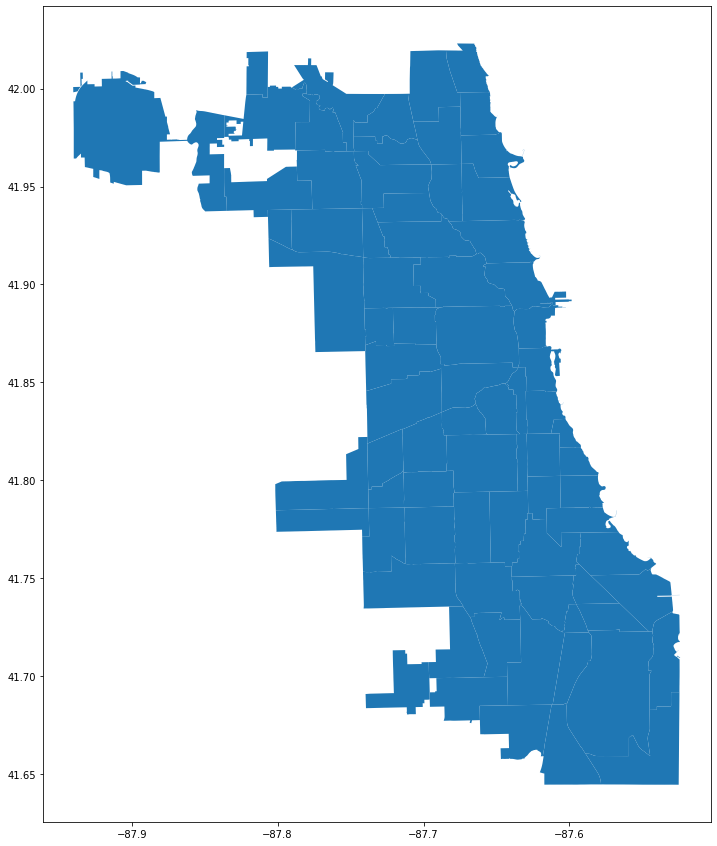

In [ ]:
#Visualize unplotted map
fig,ax = plt.subplots(figsize = (15,15))
chi_map.plot(ax=ax)

In [ ]:
#Import and set coordinate reference system 
from pyproj import CRS

crs=CRS('EPSG:4326')

In [ ]:
#We use geopandas points_from_xy() to transform Longitude and Latitude into a list of 
# shapely Point objects and set it as a geometry while creating the GeoDataFrame. 
gdf1 = gpd.GeoDataFrame(
    crimeloc2, geometry=gpd.points_from_xy(crimeloc2.LONGITUDE, crimeloc2.LATITUDE))
gdf1.head()

,LATITUDE,LONGITUDE,Crime Occured,geometry
0,41.765736,-87.663819,1,POINT (-87.66382 41.76574)
1,41.882257,-87.763759,1,POINT (-87.76376 41.88226)
2,41.760156,-87.556753,1,POINT (-87.55675 41.76016)
3,41.894369,-87.626791,1,POINT (-87.62679 41.89437)
4,41.876423,-87.735331,1,POINT (-87.73533 41.87642)


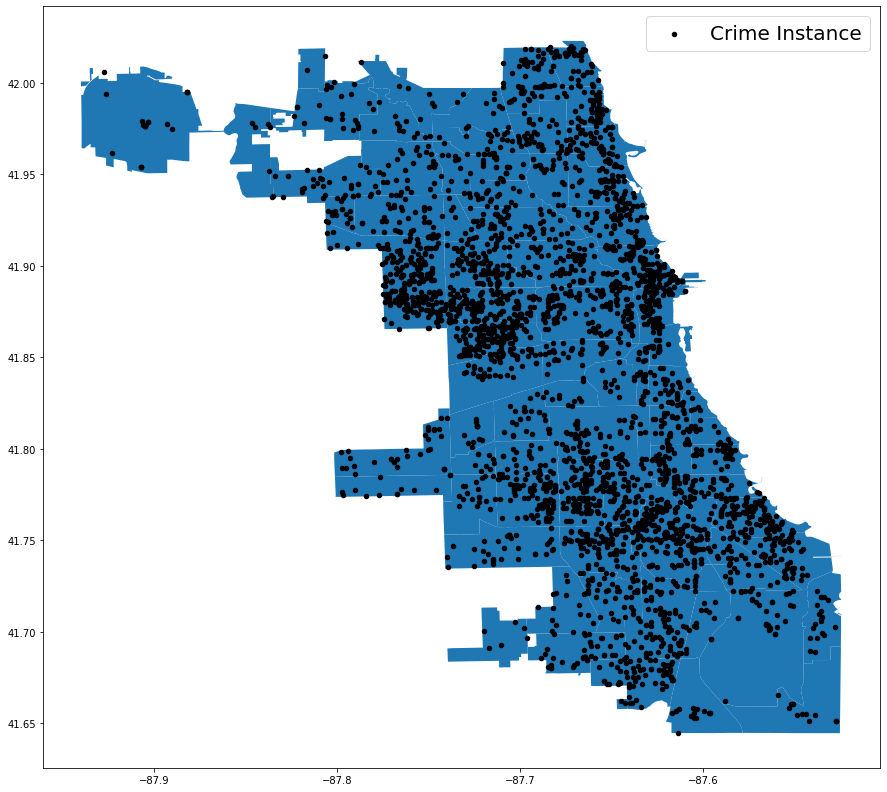

In [ ]:

fig,ax = plt.subplots(figsize = (15,15))
chi_map.plot(ax=ax) #color = 'grey')
gdf1[gdf1['Crime Occured'] ==1].plot(ax=ax, markersize = 20, color = 'black', marker = 'o', label ='Crime Instance')
plt.legend(prop={'size': 20})